In [82]:
import pandas as pd #type: ignore
df = pd.read_csv('Term_deposit_data/Train.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [83]:
print(f'Unique values in job: {df.job.unique()}')
print(f'Unique values in marital: {df.marital.unique()}')
print(f'Unique values in education: {df.education.unique()}')
print(f'Unique values in default: {df.default.unique()}')
print(f'Unique values in housing: {df.housing.unique()}')
print(f'Unique values in loan: {df.loan.unique()}')
print(f'Unique values in contact: {df.contact.unique()}')
print(f'Unique values in month: {df.month.unique()}')
print(f'Unique values in poutcome: {df.poutcome.unique()}')

Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in marital: ['married' 'single' 'divorced']
Unique values in education: ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in default: ['no' 'yes']
Unique values in housing: ['yes' 'no']
Unique values in loan: ['no' 'yes']
Unique values in contact: ['unknown' 'cellular' 'telephone']
Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome: ['unknown' 'failure' 'other' 'success']


In [84]:
test_df = pd.read_csv('Term_deposit_data/Test.csv')

In [85]:
def categorical_numerical_data(column, custom_dict, type='train'):
    if type == 'test':
        return test_df[column].map(custom_dict)
    else:
        return df[column].map(custom_dict)
    

job_dict = {}
marital_dict = {}
education_dict = {}
contact_dict = {}
poutcome_dict = {}
def dictionary_creator(dictionary, column_name):
    for index, value in enumerate(df[column_name].unique()):
        dictionary[value] = index
    #return dictionary

dictionary_creator(job_dict, 'job')
yes_no_dict = {'yes' : 1, 'no': 0}
dictionary_creator(marital_dict ,'marital')
dictionary_creator(education_dict, 'education')
dictionary_creator(contact_dict, 'contact')
dictionary_creator(poutcome_dict, 'poutcome')


#job_dict

In [86]:
df['job'] = categorical_numerical_data('job', job_dict)
df['marital'] = categorical_numerical_data('marital', marital_dict)
df['education'] = categorical_numerical_data('education', education_dict)
df['default'] = categorical_numerical_data('default', yes_no_dict)
df['housing'] = categorical_numerical_data('housing', yes_no_dict)
df['loan'] = categorical_numerical_data('loan', yes_no_dict)
df['contact'] = categorical_numerical_data('contact', contact_dict)
df['poutcome'] = categorical_numerical_data('poutcome', poutcome_dict)
df['y'] = categorical_numerical_data('y', yes_no_dict)


In [87]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,1,0,0,5,may,261,1,-1,0,0,0
1,44,1,1,1,0,29,1,0,0,5,may,151,1,-1,0,0,0
2,33,2,0,1,0,2,1,1,0,5,may,76,1,-1,0,0,0
3,47,3,0,2,0,1506,1,0,0,5,may,92,1,-1,0,0,0
4,33,4,1,2,0,1,0,0,0,5,may,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,0,0,1,17,nov,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,0,0,1,17,nov,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,0,0,1,17,nov,1127,5,184,3,3,1
45209,57,3,0,1,0,668,0,0,2,17,nov,508,4,-1,0,0,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int64 
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  int64 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  int64 
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int64 
 16  y          45211 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 5.9+ MB


In [89]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [90]:
df['month']

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: month, Length: 45211, dtype: object

In [91]:
df['month'] = pd.to_datetime(list(df['month']), format='%b').month 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,1,1,1,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,2,0,1,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,3,0,2,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,4,1,2,0,1,0,0,0,5,5,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,0,0,1,17,11,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,0,0,1,17,11,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,0,0,1,17,11,1127,5,184,3,3,1
45209,57,3,0,1,0,668,0,0,2,17,11,508,4,-1,0,0,0


In [92]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [93]:
input_features = df.columns[:-1]
output_features = df.columns[-1]
X = df[input_features]
y = df[output_features]
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X,y)

RandomForestClassifier()

In [94]:

test_df.shape

(4521, 17)

In [95]:
test_df['job'] = categorical_numerical_data('job', job_dict, 'test')
test_df['marital'] = categorical_numerical_data('marital', marital_dict, 'test')
test_df['education'] = categorical_numerical_data('education', education_dict, 'test')
test_df['default'] = categorical_numerical_data('default', yes_no_dict, 'test')
test_df['housing'] = categorical_numerical_data('housing', yes_no_dict, 'test')
test_df['loan'] = categorical_numerical_data('loan', yes_no_dict, 'test')
test_df['contact'] = categorical_numerical_data('contact', contact_dict, 'test')
test_df['poutcome'] = categorical_numerical_data('poutcome', poutcome_dict, 'test')
test_df['y'] = categorical_numerical_data('y', yes_no_dict, 'test')


In [96]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,0,3,0,1787,0,0,1,19,oct,79,1,-1,0,0,0
1,33,7,0,1,0,4789,1,1,1,11,may,220,1,339,4,1,0
2,35,0,1,0,0,1350,1,0,1,16,apr,185,1,330,1,1,0
3,30,0,0,0,0,1476,1,1,0,3,jun,199,4,-1,0,0,0
4,59,3,0,1,0,0,1,0,0,5,may,226,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,0,1,0,-333,1,0,1,30,jul,329,5,-1,0,0,0
4517,57,8,0,0,1,-3313,1,1,0,9,may,153,1,-1,0,0,0
4518,57,1,0,1,0,295,0,0,1,19,aug,151,11,-1,0,0,0
4519,28,3,0,1,0,1137,0,0,1,6,feb,129,4,211,3,2,0


In [98]:
test_df['month'] = pd.to_datetime(list(test_df['month']), format='%b').month 

In [99]:
X_test = test_df[input_features]
y_test = test_df[output_features]
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Model is: {accuracy}')

Accuracy of the Model is: 1.0


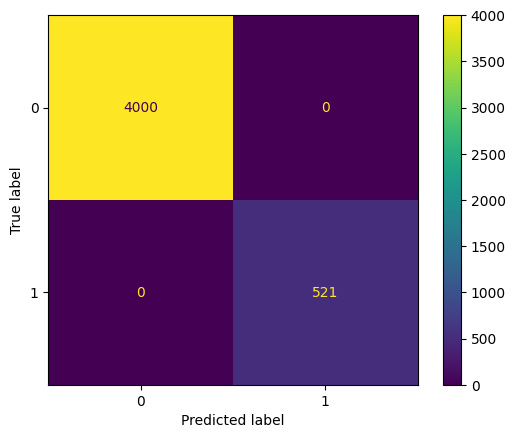

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()